In [1]:
%matplotlib inline
# Import standard python libraries
import numpy as np
import datetime
import networkx as nx
import matplotlib.pyplot as plt
import math
# Import Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit import BasicAer
from qiskit.aqua import QuantumInstance
from qiskit.aqua import Operator, run_algorithm
from qiskit.aqua.input import EnergyInput
from qiskit.aqua.translators.ising import portfolio
from qiskit.aqua.translators.data_providers import RandomDataProvider
from qiskit.aqua.algorithms import VQE, QAOA, ExactEigensolver
from qiskit.aqua.components.optimizers import SPSA, COBYLA
from qiskit.aqua.components.variational_forms import RY
import qiskit.aqua.translators.ising.vehicle_routing as vr

ImportError: cannot import name 'Operator' from 'qiskit.aqua' (e:\developmentenvironments\anaconda3\envs\qiskit20\lib\site-packages\qiskit\aqua\__init__.py)

In [2]:
# Initialize the problem by defining the parameters
n = 4  # number of nodes + depot (n+1)
K = 1  # number of vehicles

In [3]:
#DataPrep
#Number of zones
no_zones=12
#Hub Coordinates
#hub =[0, , ]
#Input Training Data, columns: Age, Annual Income, Annual Spend
input_data = eval(open('vehicle_routing_nodes.txt', 'r').read())

In [4]:
xDummy = input_data['x']
yDummy = input_data['y']
#x0 = 40.72374; y0 = -73.99239
x0 = xDummy[0]; y0 = yDummy[0]
#Customer coordinates
xs_orig = np.array(xDummy[1:])
ys_orig = np.array(yDummy[1:])
print(xs_orig)
print(ys_orig)

[40.72102 40.71824 40.72633 40.72828 40.75074 40.75213 40.75651 40.76173
 40.77631 40.77553 40.77236 40.7793  40.76912 40.75305 40.74885 40.74704
 40.74558 40.73917 40.73677 40.73691 40.72907 40.72282 40.70914 40.70553
 40.70409 40.72158 40.70302 40.72296 40.7254  40.74732 40.73789 40.73809
 40.74867 40.75831 40.78155 40.7912 ]
[-73.983 -73.988 -73.978 -74.01  -74.004 -73.98  -73.992 -73.994 -73.983
 -73.953 -73.927 -73.916 -73.905 -73.933 -73.941 -73.953 -73.905 -73.92
 -73.955 -73.899 -73.92  -73.901 -73.907 -73.894 -73.931 -73.94  -73.987
 -74.047 -74.069 -74.062 -74.053 -74.028 -74.041 -74.044 -74.051 -74.009]


In [5]:
#print (len(ys_orig))
XS = np.split(xs_orig,no_zones)
YS = np.split(ys_orig,no_zones)
#print ("XS:",XS,'\n')
#print ("YS:",YS,'\n')
#Create nodes dictionary
nodes = {0:{'x':x0, 'y':y0, 'color':'#bbbb00','id':0}}
zones = [[]] * no_zones
zonecount=0; nodecount=0

#For Koushik: 1st Integration Point
#Calculate zones using SP's code


for xzone in XS:
    yzone=YS[zonecount]
    zones[zonecount] = [0]
    #print("zone: ",zonecount," : ",xzone,yzone)
    i=0
    for x in xzone:
        nodes[nodecount+1] = {'x':x,'y':yzone[i], 'color':'#00bbee', 'id':(nodecount+1)}
        zones[zonecount].append(nodecount+1)
        i = i+1
        nodecount=nodecount+1
    print(zones[zonecount])
    zonecount=zonecount+1
print(nodes)

[0, 1, 2, 3]
[0, 4, 5, 6]
[0, 7, 8, 9]
[0, 10, 11, 12]
[0, 13, 14, 15]
[0, 16, 17, 18]
[0, 19, 20, 21]
[0, 22, 23, 24]
[0, 25, 26, 27]
[0, 28, 29, 30]
[0, 31, 32, 33]
[0, 34, 35, 36]
{0: {'x': 40.72374, 'y': -73.99239, 'color': '#bbbb00', 'id': 0}, 1: {'x': 40.72102, 'y': -73.983, 'color': '#00bbee', 'id': 1}, 2: {'x': 40.71824, 'y': -73.988, 'color': '#00bbee', 'id': 2}, 3: {'x': 40.72633, 'y': -73.978, 'color': '#00bbee', 'id': 3}, 4: {'x': 40.72828, 'y': -74.01, 'color': '#00bbee', 'id': 4}, 5: {'x': 40.75074, 'y': -74.004, 'color': '#00bbee', 'id': 5}, 6: {'x': 40.75213, 'y': -73.98, 'color': '#00bbee', 'id': 6}, 7: {'x': 40.75651, 'y': -73.992, 'color': '#00bbee', 'id': 7}, 8: {'x': 40.76173, 'y': -73.994, 'color': '#00bbee', 'id': 8}, 9: {'x': 40.77631, 'y': -73.983, 'color': '#00bbee', 'id': 9}, 10: {'x': 40.77553, 'y': -73.953, 'color': '#00bbee', 'id': 10}, 11: {'x': 40.77236, 'y': -73.927, 'color': '#00bbee', 'id': 11}, 12: {'x': 40.7793, 'y': -73.916, 'color': '#00bbee', 'id

In [6]:
#For Koushik: 2nd Integration Point
#Create distance matrix using Bing API - using Shantanu/Kavitha's code



distance_matrix = np.matrix([[0.00000,0.57900,0.67900,1.11700,1.42900,2.72900,2.35900,3.10900,3.53400,5.40900,4.43500,9.59500,9.97100,8.61600,4.92700,4.61700,3.92800,6.85900,5.78800,4.58000,6.42600,5.28900,6.35300,6.07800,7.63500,4.02800,3.81300,2.55700,4.19700,5.19700,5.28000,4.37800,4.24300,4.61300,5.32400,7.92100,7.58100],
[0.57900,0.00000,0.58700,0.55600,2.01500,3.27200,3.32100,4.07100,4.49600,6.37000,5.05800,9.50500,9.88100,8.52600,5.54500,5.23400,4.54500,6.76900,5.69800,5.19800,6.33600,5.19900,6.26300,5.98800,7.54400,3.93800,3.72300,4.04900,4.78300,5.78400,5.86600,4.96500,4.82900,5.20000,5.91100,8.88300,8.54300],
[0.67900,0.58700,0.00000,1.03300,1.97400,3.43900,3.79900,3.81900,4.24500,6.11900,5.53600,8.94100,9.31800,7.96300,6.54300,6.15100,5.02300,6.20600,5.13400,3.93800,5.77300,4.63500,5.70000,5.42500,6.98100,3.37400,3.16000,2.54800,4.58100,5.58200,5.66400,4.76200,4.62700,4.99700,5.70800,8.63200,8.29200],
[1.11700,0.55600,1.03300,0.00000,2.53300,3.64000,2.38200,3.13100,3.55600,5.43100,4.12200,10.03600,10.41300,8.65600,4.60500,4.29500,3.60600,6.89900,6.22900,4.25800,6.46600,5.35800,6.23700,7.20000,7.51900,4.47000,4.25500,4.95000,5.30100,6.30100,6.38400,5.48200,5.34700,5.71700,7.63400,7.94400,7.60400],
[1.42900,2.01500,1.97400,2.53300,0.00000,1.88900,3.73400,3.28700,2.93600,4.16300,6.52100,12.40700,12.78300,11.42800,6.88200,6.57200,5.88300,9.67100,8.59900,6.53500,9.23800,8.10000,9.16500,8.44600,9.08900,6.29500,6.62500,3.14900,3.55600,4.55600,4.63800,3.73700,3.60100,3.97200,4.68300,7.20000,6.86000],
[2.72900,3.27200,3.43900,3.64000,1.88900,0.00000,2.24600,1.79900,1.44900,2.67600,5.03300,6.78500,14.37900,9.44500,5.39400,5.08400,4.39500,7.68800,5.69800,5.04700,7.25500,6.14700,7.02700,7.98900,8.30800,8.07700,6.89200,4.74500,5.15100,6.15200,6.23400,5.33200,5.19700,5.56800,5.40200,5.71200,5.37200],
[2.35900,3.32100,3.79900,2.38200,3.73400,2.24600,0.00000,1.15100,1.20200,2.26500,2.68000,8.37000,10.95100,7.68700,3.63600,3.32600,2.63700,5.93000,3.93900,3.28900,5.49700,4.38900,5.26800,6.23100,6.55000,6.31900,5.13400,6.39200,7.32400,9.03700,7.76100,7.50500,6.63900,6.28400,6.15100,6.46100,6.12100],
[3.10900,4.07100,3.81900,3.13100,3.28700,1.79900,1.15100,0.00000,0.51900,1.70400,3.70100,6.14000,7.21600,8.84300,4.79200,4.48200,3.79300,7.08600,5.09500,4.44500,6.65300,5.54500,6.42400,7.38600,7.70600,7.47500,6.29000,6.06100,8.94100,8.18300,6.41000,7.48500,5.28800,4.93300,4.79900,5.11000,4.77000],
[3.53400,4.49600,4.24500,3.55600,2.93600,1.44900,1.20200,0.51900,0.00000,1.21100,3.44300,9.33300,6.95800,9.19200,4.26100,4.83100,4.14200,7.43500,5.44500,4.79400,7.00200,5.89400,6.77400,7.73600,8.05500,7.82400,6.63900,6.32500,6.73200,8.17900,6.40500,6.91300,5.28300,4.92800,4.79500,5.10500,4.76500],
[5.40900,6.37000,6.11900,5.43100,4.16300,2.67600,2.26500,1.70400,1.21100,0.00000,2.43200,5.61200,6.68800,9.99500,3.99100,4.35700,4.94500,5.43000,5.06000,5.59700,7.80500,6.69600,7.57600,8.53800,8.85800,8.62700,7.44200,7.40200,7.80900,8.80900,8.44500,7.99000,7.85400,6.96800,6.83400,7.14400,6.80400],
[4.43500,5.05800,5.53600,4.12200,6.52100,5.03300,2.68000,3.70100,3.44300,2.43200,0.00000,5.87900,6.50600,6.27900,3.38300,3.63400,3.72500,4.70600,4.33600,5.55000,7.75800,6.65000,7.53000,8.49200,8.81100,8.58000,7.39500,8.31700,10.12700,11.12700,10.81200,10.30800,9.68900,9.33500,9.20100,9.51100,9.17100],
[9.59500,9.50500,8.94100,10.03600,12.40700,6.78500,8.37000,6.14000,9.33300,5.61200,5.87900,0.00000,0.91700,1.31400,1.75400,2.78900,2.51800,3.04800,4.64000,3.41100,3.62700,4.86600,4.68300,6.12900,6.79400,7.28700,6.10100,10.25900,14.77200,15.77200,15.85500,14.95300,14.81800,15.18800,10.27400,10.58400,14.91200],
[9.97100,9.88100,9.31800,10.41300,12.78300,14.37900,10.95100,7.21600,6.95800,6.68800,6.50600,0.91700,0.00000,1.09400,2.41000,3.49900,3.38500,3.04300,4.63500,4.17300,3.62100,4.86000,4.67700,6.12300,6.78900,7.28100,6.09600,10.25300,14.76600,15.76700,21.91700,14.94700,14.81200,15.18200,21.09800,19.68100,15.07700],
[8.61600,8.52600,7.96300,8.65600,11.42800,9.44500,7.68700,8.84300,9.19200,9.99500,6.27900,1.31400,1.09400,0.00000,2.27100,5.44300,3.37400,2.18200,3.77400,4.23300,2.76100,3.99900,3.81600,5.26200,5.92800,6.42000,5.23500,9.39200,13.90500,14.90600,14.98800,14.08600,13.95100,14.32100,12.94300,13.25300,12.91300],
[4.92700,5.54500,6.54300,4.60500,6.88200,5.39400,3.63600,4.79200,4.26100,3.99100,3.38300,1.75400,2.41000,2.27100,0.00000,1.35200,1.44800,2.09300,1.80000,2.30700,2.89100,2.66600,3.88000,4.96900,5.16200,4.70100,3.51600,7.67300,12.18600,13.18700,10.78100,12.36700,9.65900,9.30400,9.17100,9.48100,9.14100],
[4.61700,5.23400,6.15100,4.29500,6.57200,5.08400,3.32600,4.48200,4.83100,4.35700,3.63400,2.78900,3.49900,5.44300,1.35200,0.00000,4.39500,5.37500,5.00600,5.25400,8.30500,7.19700,8.07700,9.03900,9.35900,9.12800,7.94200,8.86500,10.67400,11.67500,11.35900,10.85500,10.23700,9.88200,9.74900,10.05900,9.71900],
[3.92800,4.54500,5.02300,3.60600,5.88300,4.39500,2.63700,3.79300,4.14200,4.94500,3.72500,2.51800,3.38500,3.37400,1.44800,4.39500,0.00000,2.74400,2.32900,1.26500,3.97300,2.86500,3.74500,4.83400,5.02600,4.79500,3.61000,7.76700,9.32800,10.32800,9.76500,9.50900,8.64300,8.28800,8.15500,8.46500,8.12500],
[6.85900,6.76900,6.20600,6.89900,9.67100,7.68800,5.93000,7.08600,7.43500,5.43000,4.70600,3.04800,3.04300,2.18200,2.09300,5.37500,2.74400,0.00000,1.13200,3.48600,0.96900,1.70400,2.58200,2.95900,3.62500,3.68300,3.52100,7.67800,12.19100,13.19200,13.27400,12.37200,12.23700,12.60800,11.22900,11.54000,11.20000],
[5.78800,5.69800,5.13400,6.22900,8.59900,5.69800,3.93900,5.09500,5.44500,5.06000,4.33600,4.64000,4.63500,3.77400,1.80000,5.00600,2.32900,1.13200,0.00000,3.02800,1.53400,0.92100,1.99700,2.73700,3.27800,3.15100,1.96600,6.12300,10.63600,11.63600,11.71900,10.81700,10.68200,11.05200,11.76300,9.91000,9.57000],
[4.58000,5.19800,3.93800,4.25800,6.53500,5.04700,3.28900,4.44500,4.79400,5.59700,5.55000,3.41100,4.17300,4.23300,2.30700,5.25400,1.26500,3.48600,3.02800,0.00000,4.07700,2.61700,3.84800,4.20500,4.79900,3.22500,1.93700,5.53600,10.04900,11.05000,10.36200,10.23000,10.09500,10.46500,8.75200,9.06200,8.72200],
[6.42600,6.33600,5.77300,6.46600,9.23800,7.25500,5.49700,6.65300,7.00200,7.80500,7.75800,3.62700,3.62100,2.76100,2.89100,8.30500,3.97300,0.96900,1.53400,4.07700,0.00000,1.70500,1.28800,2.37300,2.62300,3.44100,3.23500,7.39200,11.90600,12.90600,12.64200,12.08700,11.95100,12.32200,11.03200,11.34200,11.00200],
[5.28900,5.19900,4.63500,5.35800,8.10000,6.14700,4.38900,5.54500,5.89400,6.69600,6.65000,4.86600,4.86000,3.99900,2.66600,7.19700,2.86500,1.70400,0.92100,2.61700,1.70500,0.00000,1.52100,1.88700,2.48100,2.55600,2.32500,6.48300,10.99600,11.99600,12.07900,11.17700,11.04100,11.41200,10.12200,10.43200,10.09200],
[6.35300,6.26300,5.70000,6.23700,9.16500,7.02700,5.26800,6.42400,6.77400,7.57600,7.53000,4.68300,4.67700,3.81600,3.88000,8.07700,3.74500,2.58200,1.99700,3.84800,1.28800,1.52100,0.00000,1.22500,1.47400,2.12600,2.62700,7.34900,11.86300,12.86300,12.94500,12.04400,11.90800,12.27900,10.91400,11.22400,10.88400],
[6.07800,5.98800,5.42500,7.20000,8.44600,7.98900,6.23100,7.38600,7.73600,8.53800,8.49200,6.12900,6.12300,5.26200,4.96900,9.03900,4.83400,2.95900,2.73700,4.20500,2.37300,1.88700,1.22500,0.00000,1.29700,1.68100,2.25200,6.30800,10.82100,11.82200,11.90400,11.00200,11.21300,11.58300,11.99600,12.30700,11.96600],
[7.63500,7.54400,6.98100,7.51900,9.08900,8.30800,6.55000,7.70600,8.05500,8.85800,8.81100,6.79400,6.78900,5.92800,5.16200,9.35900,5.02600,3.62500,3.27800,4.79900,2.62300,2.48100,1.47400,1.29700,0.00000,2.58100,3.15100,8.80600,13.31900,14.31900,14.40200,13.50000,13.36400,13.73500,12.37100,12.68100,12.34100],
[4.02800,3.93800,3.37400,4.47000,6.29500,8.07700,6.31900,7.47500,7.82400,8.62700,8.58000,7.28700,7.28100,6.42000,4.70100,9.12800,4.79500,3.68300,3.15100,3.22500,3.44100,2.55600,2.12600,1.68100,2.58100,0.00000,1.49100,4.08200,8.59500,9.59500,9.67800,8.77600,8.64000,9.01100,9.72200,12.41400,12.07400],
[3.81300,3.72300,3.16000,4.25500,6.62500,6.89200,5.13400,6.29000,6.63900,7.44200,7.39500,6.10100,6.09600,5.23500,3.51600,7.94200,3.61000,3.52100,1.96600,1.93700,3.23500,2.32500,2.62700,2.25200,3.15100,1.49100,0.00000,4.47100,8.98400,9.98500,10.06700,9.16600,9.03000,9.40100,10.89900,11.20900,10.86900],
[2.55700,4.04900,2.54800,4.95000,3.14900,4.74500,6.39200,6.06100,6.32500,7.40200,8.31700,10.25900,10.25300,9.39200,7.67300,8.86500,7.76700,7.67800,6.12300,5.53600,7.39200,6.48300,7.34900,6.30800,8.80600,4.08200,4.47100,0.00000,6.14400,7.14400,7.22700,6.32500,6.19000,6.56000,7.27100,10.67000,10.33000],
[4.19700,4.78300,4.58100,5.30100,3.55600,5.15100,7.32400,8.94100,6.73200,7.80900,10.12700,14.77200,14.76600,13.90500,12.18600,10.67400,9.32800,12.19100,10.63600,10.04900,11.90600,10.99600,11.86300,10.82100,13.31900,8.59500,8.98400,6.14400,0.00000,1.38200,2.24200,1.36400,2.29300,2.24400,3.25400,5.95800,7.61000],
[5.19700,5.78400,5.58200,6.30100,4.55600,6.15200,9.03700,8.18300,8.17900,8.80900,11.12700,15.77200,15.76700,14.90600,13.18700,11.67500,10.32800,13.19200,11.63600,11.05000,12.90600,11.99600,12.86300,11.82200,14.31900,9.59500,9.98500,7.14400,1.38200,0.00000,1.81200,1.45900,3.16100,2.53600,2.83400,5.52800,7.18100],
[5.28000,5.86600,5.66400,6.38400,4.63800,6.23400,7.76100,6.41000,6.40500,8.44500,10.81200,15.85500,21.91700,14.98800,10.78100,11.35900,9.76500,13.27400,11.71900,10.36200,12.64200,12.07900,12.94500,11.90400,14.40200,9.67800,10.06700,7.22700,2.24200,1.81200,0.00000,1.13000,2.42100,1.82500,1.60300,3.77100,5.42400],
[4.37800,4.96500,4.76200,5.48200,3.73700,5.33200,7.50500,7.48500,6.91300,7.99000,10.30800,14.95300,14.94700,14.08600,12.36700,10.85500,9.50900,12.37200,10.81700,10.23000,12.08700,11.17700,12.04400,11.00200,13.50000,8.77600,9.16600,6.32500,1.36400,1.45900,1.13000,0.00000,1.85800,1.20900,1.71900,4.79900,6.45200],
[4.24300,4.82900,4.62700,5.34700,3.60100,5.19700,6.63900,5.28800,5.28300,7.85400,9.68900,14.81800,14.81200,13.95100,9.65900,10.23700,8.64300,12.23700,10.68200,10.09500,11.95100,11.04100,11.90800,11.21300,13.36400,8.64000,9.03000,6.19000,2.29300,3.16100,2.42100,1.85800,0.00000,1.85300,2.56400,4.90300,5.27800],
[4.61300,5.20000,4.99700,5.71700,3.97200,5.56800,6.28400,4.93300,4.92800,6.96800,9.33500,15.18800,15.18200,14.32100,9.30400,9.88200,8.28800,12.60800,11.05200,10.46500,12.32200,11.41200,12.27900,11.58300,13.73500,9.01100,9.40100,6.56000,2.24400,2.53600,1.82500,1.20900,1.85300,0.00000,0.78800,4.27700,3.91700],
[5.32400,5.91100,5.70800,7.63400,4.68300,5.40200,6.15100,4.79900,4.79500,6.83400,9.20100,10.27400,21.09800,12.94300,9.17100,9.74900,8.15500,11.22900,11.76300,8.75200,11.03200,10.12200,10.91400,11.99600,12.37100,9.72200,10.89900,7.27100,3.25400,2.83400,1.60300,1.71900,2.56400,0.78800,0.00000,2.92700,4.58000],
[7.92100,8.88300,8.63200,7.94400,7.20000,5.71200,6.46100,5.11000,5.10500,7.14400,9.51100,10.58400,19.68100,13.25300,9.48100,10.05900,8.46500,11.54000,9.91000,9.06200,11.34200,10.43200,11.22400,12.30700,12.68100,12.41400,11.20900,10.67000,5.95800,5.52800,3.77100,4.79900,4.90300,4.27700,2.92700,0.00000,3.97200],
[7.58100,8.54300,8.29200,7.60400,6.86000,5.37200,6.12100,4.77000,4.76500,6.80400,9.17100,14.91200,15.07700,12.91300,9.14100,9.71900,8.12500,11.20000,9.57000,8.72200,11.00200,10.09200,10.88400,11.96600,12.34100,12.07400,10.86900,10.33000,7.61000,7.18100,5.42400,6.45200,5.27800,3.91700,4.58000,3.97200,0.00000]])

def get_xs_and_ys_for_a_zone (zone_id):
    xs=[] ; ys=[]
    i=0
    for node in zones[zone_id]:
        xs.append(nodes.get(node).get('x'))
        ys.append(nodes.get(node).get('y'))
        i=i+1
    return xs,ys

#Create a random customer-customer distance matrix
def create_distance_matrix_for_zone1(zone_id):
    if (zone_id>=0):
        nodes1 = zones[zone_id]
    print (nodes1)
    abc = distance_matrix[np.ix_(nodes1,nodes1)]
    print(abc)

    return abc

#Create a random customer-customer distance matrix
def create_distance_matrix_for_zone(zone_id):
    if (zone_id>=0):
        xs, ys = get_xs_and_ys_for_a_zone(zone_id)
    else:
        xs, ys = xs_orig, ys_orig

    n=len(xs)
    instance = np.zeros([n, n])
    for i in range(0, n):
        for j in range(i + 1, n):
            #print ('nodes = ',(xs[i],ys[i]),(xs[j],ys[j]))
            #Distance squared
            #instance[i, j] = (xs[i] - xs[j]) ** 2 + (ys[i] - ys[j]) ** 2
            instance[i, j] = math.sqrt((xs[i] - xs[j]) ** 2 + (ys[i] - ys[j]) ** 2)
            #jith element is made the same as ijth element - so that the matrix is a symmetric
            instance[j, i] = instance[i, j]
            #print (instance[i,j])
    return instance

def plot_nodes (graph, zone_id):
    xs, ys = get_xs_and_ys_for_a_zone(zone_id)
    nodelist=zones[zone_id]
    # plt.gca().invert_yaxis()
    # plt.gca().invert_xaxis()
    n=len(xs)
    keys = range(len(xs))
    i=0
    for k in nodelist:
        pos[k] = (xs[i], ys[i])
        i=i+1
    print(pos)
    plt.figure()
    fig = plt.gcf()
    ax=fig.gca()
    fig.set_size_inches(12,8)
    plt.title('Customer Graph')
    plt.xlabel('X')
    plt.ylabel('Y')

    # Add Edges
    #for i in keys:
    #    for j in range(i+1, n):
    #        X.add_edge(i, j, length=int(instance[i][j]))
    # Add Edges
    i=0;j=1
    for i in range(len(nodelist)):
        for j in range(i+1, n):
            node_a=nodelist[i]; node_b=nodelist[j]
            #X.add_edge(node_a, node_b, length=int(instance[i][j]))
            X.add_edge(node_a, node_b, length=int(instance[node_a,node_b]))

    nx.draw_networkx(graph, pos, node_size=350, edge_color='#cccccc',ax=ax,
                     nodelist=nodelist, node_color='#00bbee', alpha=0.7, with_labels=True)
    labels = nx.get_edge_attributes(graph, "length")
    print(labels)
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)
    #plt.xticks((0, 0.5, 1), ("0", "0.5", "1"))
    #plt.grid(True)
    plt.show()

def get_hamiltonian_paths(graph, target):
    allpaths = nx.all_simple_paths(graph, source=0, target=target)
    #Print Hamiltonian Paths
    selectedPaths = [path for path in list(allpaths) if len(path)==4]
    return selectedPaths   

def get_min_cost_function(selectedPaths) :
    min_cost=100000
    min_cost_path = None
    for path in list(selectedPaths):
        total_length=0
        for k in range(len(path)-1):
            x,y = path[k], path[k+1]
            edge = X[x][y]
            #print (path, x, y)
            length = distance_matrix[x,y]
            #print (path, x, y, length)
            total_length += length
        print('{}: {}'.format(path, total_length))
        if min_cost>total_length:
            min_cost=total_length
            min_cost_path = path
    return min_cost, min_cost_path
# Visualize the solution
def draw_tsp_solution(G, order, pos):
    plt.figure()
    fig = plt.gcf()
    fig.set_size_inches(12,8)
    plt.title('Customer Graph : Cost = '+ str(min_cost))
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid()

    #G1 = G.copy()
    G1 = nx.Graph()
    #edges = list(G1.edges())
    #G2 = G1.remove_edges_from(edges)
    G1 = G1.to_directed()
    n = len(order)
    i=0;j=1
    for i in range(len(order)-1):
        j=i+1
        node_a=order[i]; node_b=order[i+1]
        print (node_a,node_b, 'length: ',instance[node_a][node_b])
        G1.add_edge(node_a, node_b, length=int(instance[node_a][node_b]))
    G1.add_edge(order[j], order[0],length=int(instance[node_b][0]))
    """
    for i in range(n-1):
        j = (i+1)#(i + 1) % n
        print(order[i],order[j])
        G1.add_edge(order[i], order[j],length=int(instance[order[i]][order[j]]))
    G1.add_edge(order[j], order[0],length=int(instance[order[j]][order[0]]))
    """
    i=0
    for k in order:
        pos[k] = (nodes[k]['x'], nodes[k]['y']) #xs[i], ys[i])
        i=i+1
    print(pos)
    #create node colors array
    #colors = np.full(len(nodes),'#ffffff')
    colors = np.full(n,'#ffffff')
    for i in range(n):
        colors[i]=nodes[order[i]]['color']
        
    #hub_index=order[0]
    #colors[hub_index]='#bbbb00'
    default_axes = plt.axes(frameon=True)
    ax=fig.gca()
    
    #mapping = {0:0,1:4,2:5,3:6}
    #nx.relabel_nodes(G1,mapping,False)
    #nx.draw_networkx(G1, pos, node_size=350, edge_color='#cccccc', ax=ax, 
    #                 node_color=colors, alpha=0.7, arrowsize=20)
    colors = ['#bbbb00','#00bbee','#00bbee','#00bbee']
    nx.draw_networkx(G1, pos, node_size=350, edge_color='#cccccc',ax=ax,
                     nodelist=order, node_color=colors, alpha=0.7, arrowsize=20, with_labels=True)
    labels = nx.get_edge_attributes(G1, "length")
    print(labels)
    nx.draw_networkx_edge_labels(G1, pos, edge_labels=labels)
    #plt.xticks((0, 0.5, 1), ("0", "0.5", "1"))
    plt.grid(True)
    plt.show()



In [7]:
abc = create_distance_matrix_for_zone1(6)
print(abc)

[0, 19, 20, 21]
[[0.    4.58  6.426 5.289]
 [4.58  0.    4.077 2.617]
 [6.426 4.077 0.    1.705]
 [5.289 2.617 1.705 0.   ]]
[[0.    4.58  6.426 5.289]
 [4.58  0.    4.077 2.617]
 [6.426 4.077 0.    1.705]
 [5.289 2.617 1.705 0.   ]]



----For Zone 0----
distance matrix : 
 [[0.    0.579 0.679 ... 5.324 7.921 7.581]
 [0.579 0.    0.587 ... 5.911 8.883 8.543]
 [0.679 0.587 0.    ... 5.708 8.632 8.292]
 ...
 [5.324 5.911 5.708 ... 0.    2.927 4.58 ]
 [7.921 8.883 8.632 ... 2.927 0.    3.972]
 [7.581 8.543 8.292 ... 4.58  3.972 0.   ]]
{0: (40.72374, -73.99239), 1: (40.72102, -73.983), 2: (40.71824, -73.988), 3: (40.72633, -73.978)}
{(0, 1): 0, (0, 2): 0, (0, 3): 1, (1, 2): 0, (1, 3): 0, (2, 3): 1}


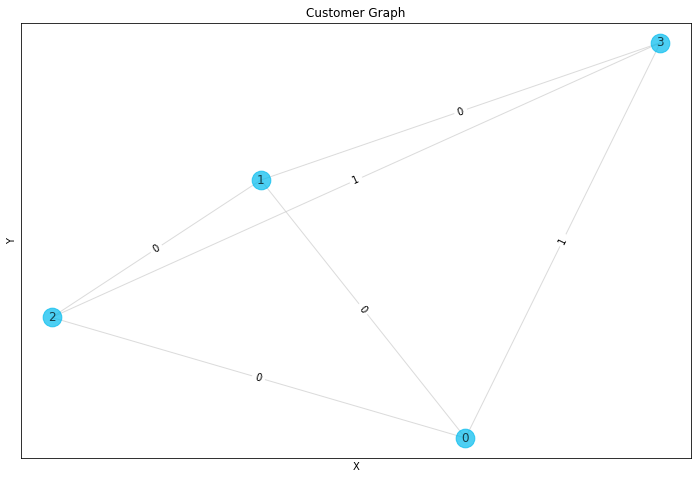

All Hamiltonian Paths from 0-3 :
 [[0, 1, 2, 3], [0, 2, 1, 3]] 

[0, 1, 2, 3]: 2.199
[0, 2, 1, 3]: 1.822
Minimum Cost for Zone 0: [0, 2, 1, 3] : 1.822

----For Zone 1----
distance matrix : 
 [[0.    0.579 0.679 ... 5.324 7.921 7.581]
 [0.579 0.    0.587 ... 5.911 8.883 8.543]
 [0.679 0.587 0.    ... 5.708 8.632 8.292]
 ...
 [5.324 5.911 5.708 ... 0.    2.927 4.58 ]
 [7.921 8.883 8.632 ... 2.927 0.    3.972]
 [7.581 8.543 8.292 ... 4.58  3.972 0.   ]]
{0: (40.72374, -73.99239), 4: (40.72828, -74.01), 5: (40.75074, -74.004), 6: (40.75213, -73.98)}
{(0, 4): 1, (0, 5): 2, (0, 6): 2, (4, 5): 1, (4, 6): 3, (5, 6): 2}


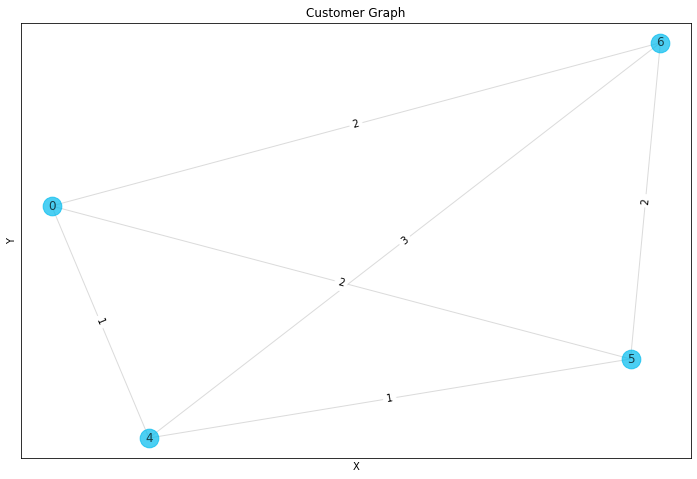

All Hamiltonian Paths from 0-6 :
 [[0, 4, 5, 6], [0, 5, 4, 6]] 

[0, 4, 5, 6]: 5.564
[0, 5, 4, 6]: 8.352
Minimum Cost for Zone 1: [0, 4, 5, 6] : 5.564

----For Zone 2----
distance matrix : 
 [[0.    0.579 0.679 ... 5.324 7.921 7.581]
 [0.579 0.    0.587 ... 5.911 8.883 8.543]
 [0.679 0.587 0.    ... 5.708 8.632 8.292]
 ...
 [5.324 5.911 5.708 ... 0.    2.927 4.58 ]
 [7.921 8.883 8.632 ... 2.927 0.    3.972]
 [7.581 8.543 8.292 ... 4.58  3.972 0.   ]]
{0: (40.72374, -73.99239), 7: (40.75651, -73.992), 8: (40.76173, -73.994), 9: (40.77631, -73.983)}
{(0, 7): 3, (0, 8): 3, (0, 9): 5, (7, 8): 0, (7, 9): 1, (8, 9): 1}


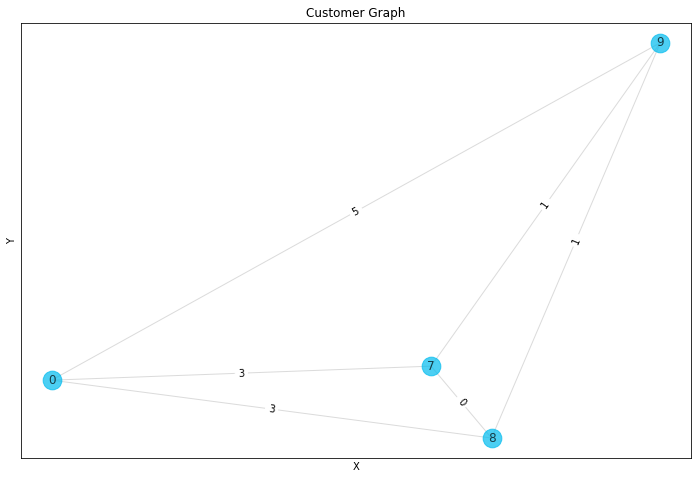

All Hamiltonian Paths from 0-9 :
 [[0, 7, 8, 9], [0, 8, 7, 9]] 

[0, 7, 8, 9]: 4.839
[0, 8, 7, 9]: 5.757
Minimum Cost for Zone 2: [0, 7, 8, 9] : 4.839

----For Zone 3----
distance matrix : 
 [[0.    0.579 0.679 ... 5.324 7.921 7.581]
 [0.579 0.    0.587 ... 5.911 8.883 8.543]
 [0.679 0.587 0.    ... 5.708 8.632 8.292]
 ...
 [5.324 5.911 5.708 ... 0.    2.927 4.58 ]
 [7.921 8.883 8.632 ... 2.927 0.    3.972]
 [7.581 8.543 8.292 ... 4.58  3.972 0.   ]]
{0: (40.72374, -73.99239), 10: (40.77553, -73.953), 11: (40.77236, -73.927), 12: (40.7793, -73.916)}
{(0, 10): 4, (0, 11): 9, (0, 12): 9, (10, 11): 5, (10, 12): 6, (11, 12): 0}


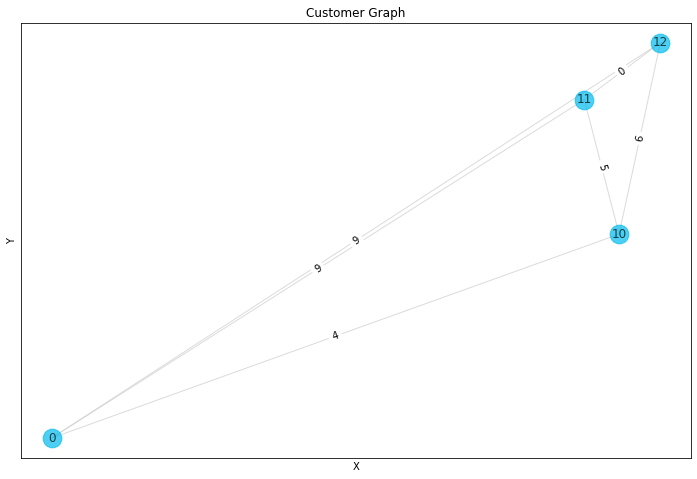

All Hamiltonian Paths from 0-12 :
 [[0, 10, 11, 12], [0, 11, 10, 12]] 

[0, 10, 11, 12]: 11.231
[0, 11, 10, 12]: 21.98
Minimum Cost for Zone 3: [0, 10, 11, 12] : 11.231

----For Zone 4----
distance matrix : 
 [[0.    0.579 0.679 ... 5.324 7.921 7.581]
 [0.579 0.    0.587 ... 5.911 8.883 8.543]
 [0.679 0.587 0.    ... 5.708 8.632 8.292]
 ...
 [5.324 5.911 5.708 ... 0.    2.927 4.58 ]
 [7.921 8.883 8.632 ... 2.927 0.    3.972]
 [7.581 8.543 8.292 ... 4.58  3.972 0.   ]]
{0: (40.72374, -73.99239), 13: (40.76912, -73.905), 14: (40.75305, -73.933), 15: (40.74885, -73.941)}
{(0, 13): 8, (0, 14): 4, (0, 15): 4, (13, 14): 2, (13, 15): 5, (14, 15): 1}


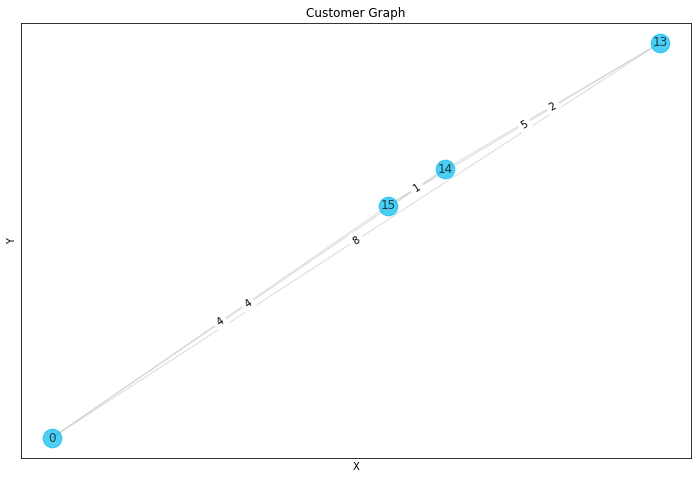

All Hamiltonian Paths from 0-15 :
 [[0, 13, 14, 15], [0, 14, 13, 15]] 

[0, 13, 14, 15]: 12.239
[0, 14, 13, 15]: 12.640999999999998
Minimum Cost for Zone 4: [0, 13, 14, 15] : 12.239

----For Zone 5----
distance matrix : 
 [[0.    0.579 0.679 ... 5.324 7.921 7.581]
 [0.579 0.    0.587 ... 5.911 8.883 8.543]
 [0.679 0.587 0.    ... 5.708 8.632 8.292]
 ...
 [5.324 5.911 5.708 ... 0.    2.927 4.58 ]
 [7.921 8.883 8.632 ... 2.927 0.    3.972]
 [7.581 8.543 8.292 ... 4.58  3.972 0.   ]]
{0: (40.72374, -73.99239), 16: (40.74704, -73.953), 17: (40.74558, -73.905), 18: (40.73917, -73.92)}
{(0, 16): 3, (0, 17): 6, (0, 18): 5, (16, 17): 2, (16, 18): 2, (17, 18): 1}


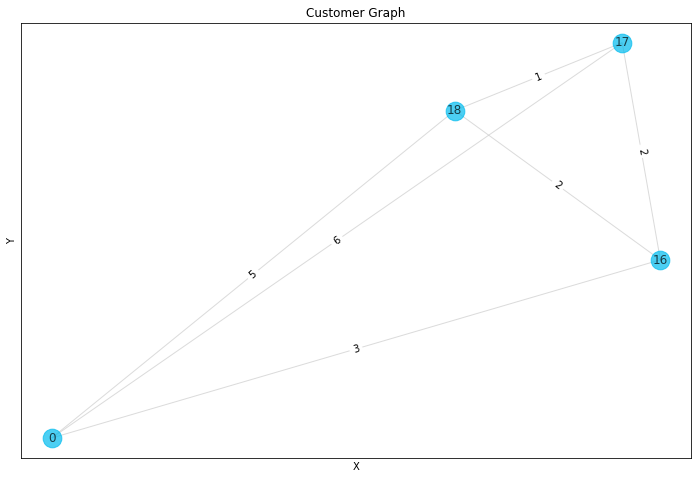

All Hamiltonian Paths from 0-18 :
 [[0, 16, 17, 18], [0, 17, 16, 18]] 

[0, 16, 17, 18]: 7.804
[0, 17, 16, 18]: 11.932
Minimum Cost for Zone 5: [0, 16, 17, 18] : 7.804

----For Zone 6----
distance matrix : 
 [[0.    0.579 0.679 ... 5.324 7.921 7.581]
 [0.579 0.    0.587 ... 5.911 8.883 8.543]
 [0.679 0.587 0.    ... 5.708 8.632 8.292]
 ...
 [5.324 5.911 5.708 ... 0.    2.927 4.58 ]
 [7.921 8.883 8.632 ... 2.927 0.    3.972]
 [7.581 8.543 8.292 ... 4.58  3.972 0.   ]]
{0: (40.72374, -73.99239), 19: (40.73677, -73.955), 20: (40.73691, -73.899), 21: (40.72907, -73.92)}
{(0, 19): 4, (0, 20): 6, (0, 21): 5, (19, 20): 4, (19, 21): 2, (20, 21): 1}


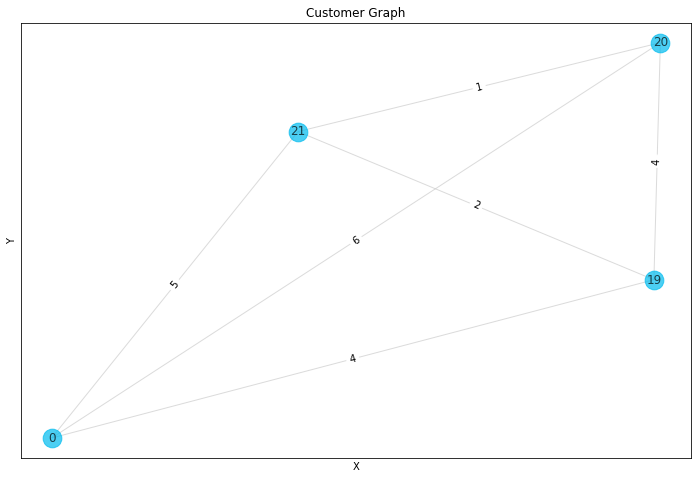

All Hamiltonian Paths from 0-21 :
 [[0, 19, 20, 21], [0, 20, 19, 21]] 

[0, 19, 20, 21]: 10.362
[0, 20, 19, 21]: 13.120000000000001
Minimum Cost for Zone 6: [0, 19, 20, 21] : 10.362

----For Zone 7----
distance matrix : 
 [[0.    0.579 0.679 ... 5.324 7.921 7.581]
 [0.579 0.    0.587 ... 5.911 8.883 8.543]
 [0.679 0.587 0.    ... 5.708 8.632 8.292]
 ...
 [5.324 5.911 5.708 ... 0.    2.927 4.58 ]
 [7.921 8.883 8.632 ... 2.927 0.    3.972]
 [7.581 8.543 8.292 ... 4.58  3.972 0.   ]]
{0: (40.72374, -73.99239), 22: (40.72282, -73.901), 23: (40.70914, -73.907), 24: (40.70553, -73.894)}
{(0, 22): 6, (0, 23): 6, (0, 24): 7, (22, 23): 1, (22, 24): 1, (23, 24): 1}


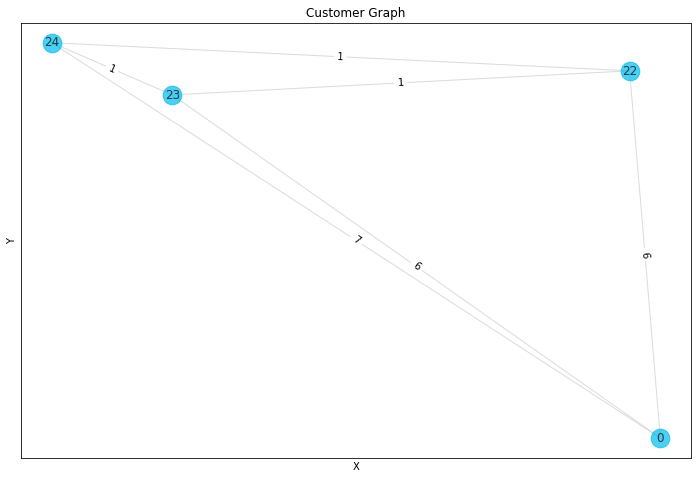

All Hamiltonian Paths from 0-24 :
 [[0, 22, 23, 24], [0, 23, 22, 24]] 

[0, 22, 23, 24]: 8.875
[0, 23, 22, 24]: 8.777000000000001
Minimum Cost for Zone 7: [0, 23, 22, 24] : 8.777000000000001

----For Zone 8----
distance matrix : 
 [[0.    0.579 0.679 ... 5.324 7.921 7.581]
 [0.579 0.    0.587 ... 5.911 8.883 8.543]
 [0.679 0.587 0.    ... 5.708 8.632 8.292]
 ...
 [5.324 5.911 5.708 ... 0.    2.927 4.58 ]
 [7.921 8.883 8.632 ... 2.927 0.    3.972]
 [7.581 8.543 8.292 ... 4.58  3.972 0.   ]]
{0: (40.72374, -73.99239), 25: (40.70409, -73.931), 26: (40.72158, -73.94), 27: (40.70302, -73.987)}
{(0, 25): 4, (0, 26): 3, (0, 27): 2, (25, 26): 1, (25, 27): 4, (26, 27): 4}


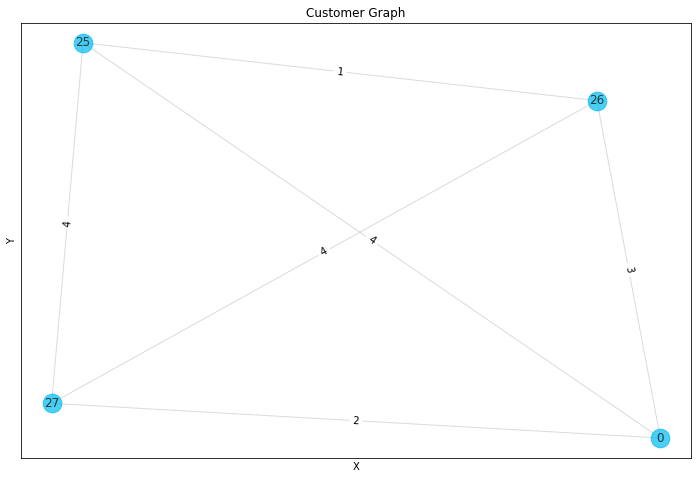

All Hamiltonian Paths from 0-27 :
 [[0, 25, 26, 27], [0, 26, 25, 27]] 

[0, 25, 26, 27]: 9.99
[0, 26, 25, 27]: 9.386
Minimum Cost for Zone 8: [0, 26, 25, 27] : 9.386

----For Zone 9----
distance matrix : 
 [[0.    0.579 0.679 ... 5.324 7.921 7.581]
 [0.579 0.    0.587 ... 5.911 8.883 8.543]
 [0.679 0.587 0.    ... 5.708 8.632 8.292]
 ...
 [5.324 5.911 5.708 ... 0.    2.927 4.58 ]
 [7.921 8.883 8.632 ... 2.927 0.    3.972]
 [7.581 8.543 8.292 ... 4.58  3.972 0.   ]]
{0: (40.72374, -73.99239), 28: (40.72296, -74.047), 29: (40.7254, -74.069), 30: (40.74732, -74.062)}
{(0, 28): 4, (0, 29): 5, (0, 30): 5, (28, 29): 1, (28, 30): 2, (29, 30): 1}


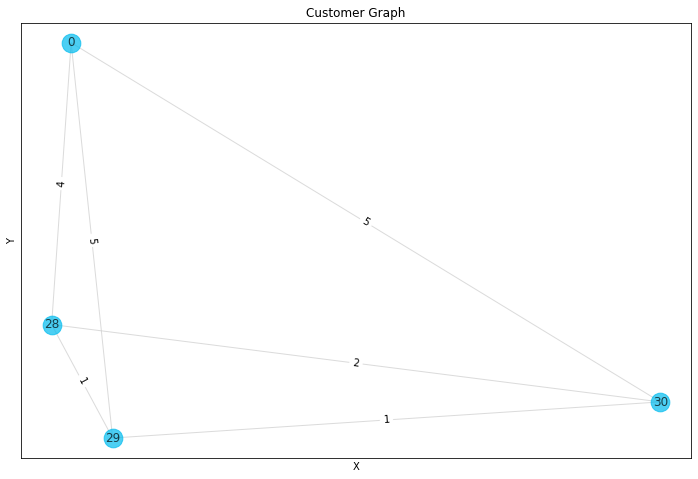

All Hamiltonian Paths from 0-30 :
 [[0, 28, 29, 30], [0, 29, 28, 30]] 

[0, 28, 29, 30]: 7.391
[0, 29, 28, 30]: 8.821
Minimum Cost for Zone 9: [0, 28, 29, 30] : 7.391

----For Zone 10----
distance matrix : 
 [[0.    0.579 0.679 ... 5.324 7.921 7.581]
 [0.579 0.    0.587 ... 5.911 8.883 8.543]
 [0.679 0.587 0.    ... 5.708 8.632 8.292]
 ...
 [5.324 5.911 5.708 ... 0.    2.927 4.58 ]
 [7.921 8.883 8.632 ... 2.927 0.    3.972]
 [7.581 8.543 8.292 ... 4.58  3.972 0.   ]]
{0: (40.72374, -73.99239), 31: (40.73789, -74.053), 32: (40.73809, -74.028), 33: (40.74867, -74.041)}
{(0, 31): 4, (0, 32): 4, (0, 33): 4, (31, 32): 1, (31, 33): 1, (32, 33): 1}


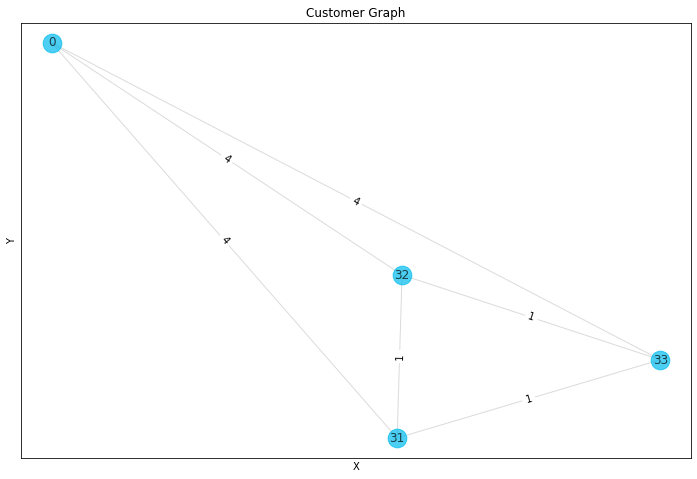

All Hamiltonian Paths from 0-33 :
 [[0, 31, 32, 33], [0, 32, 31, 33]] 

[0, 31, 32, 33]: 8.089
[0, 32, 31, 33]: 7.3100000000000005
Minimum Cost for Zone 10: [0, 32, 31, 33] : 7.3100000000000005

----For Zone 11----
distance matrix : 
 [[0.    0.579 0.679 ... 5.324 7.921 7.581]
 [0.579 0.    0.587 ... 5.911 8.883 8.543]
 [0.679 0.587 0.    ... 5.708 8.632 8.292]
 ...
 [5.324 5.911 5.708 ... 0.    2.927 4.58 ]
 [7.921 8.883 8.632 ... 2.927 0.    3.972]
 [7.581 8.543 8.292 ... 4.58  3.972 0.   ]]
{0: (40.72374, -73.99239), 34: (40.75831, -74.044), 35: (40.78155, -74.051), 36: (40.7912, -74.009)}
{(0, 34): 5, (0, 35): 7, (0, 36): 7, (34, 35): 2, (34, 36): 4, (35, 36): 3}


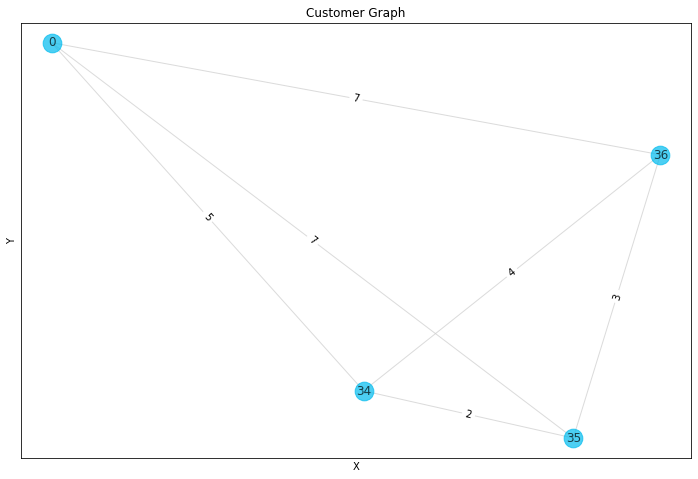

All Hamiltonian Paths from 0-36 :
 [[0, 34, 35, 36], [0, 35, 34, 36]] 

[0, 34, 35, 36]: 12.222999999999999
[0, 35, 34, 36]: 15.428
Minimum Cost for Zone 11: [0, 34, 35, 36] : 12.222999999999999


In [8]:
#Classical - Brute force solution
solutions=[]
instance=distance_matrix
for zone_id in range(len(zones)):
    nodes_for_zone=zones[zone_id]
    #instance=create_distance_matrix_for_zone(zone_id)
    print ("\n----For Zone %s----"%zone_id)
    print ('distance matrix : \n',instance)
    X = nx.Graph()
    pos = {}
    plot_nodes(X,zone_id)
    selectedPaths = get_hamiltonian_paths(X,nodes_for_zone[3])
    print('All Hamiltonian Paths from 0-%s :\n'%nodes_for_zone[3],list(selectedPaths),'\n')
    min_cost, min_cost_path = get_min_cost_function(selectedPaths)
    print('Minimum Cost for Zone {}: {} : {}'.format(zone_id, min_cost_path, min_cost))
    
    #Create the adjacency matrix
    x=np.zeros((n,n), dtype=int)
    #for k in range(len(min_cost_path)-1):
    #    x[min_cost_path[k]][min_cost_path[k+1]]=1
    #x[min_cost_path[k+1]][0]=1
    #x=x.flatten()
    #print(x) 


    #draw_tsp_solution(X,min_cost_path,pos)
    solutions.append(min_cost_path)

In [9]:
def get_coordinates_array(xs,ys):
    coords=[[]] * len(xs)
    for i in range(len(xs)):
        coords[i]=([xs[i],ys[i]])
    return coords

def get_coordinates_array_for_zone(zone_id):
    coords=[[]] * 4
    zone_nodes=zones[zone_id]
    i=0
    for node in zone_nodes:
        coords[i]=(nodes[node]['x'],nodes[node]['y'])
        i=i+1
    return coords

def shift_solution_nodes(z, target_nodes):
    z2 = np.zeros(len(z), dtype=int)
    i = z.index(0)
    roll_by = len(z)-i
    z1 = np.roll(z,roll_by)
    for i in range(len(z)):
        z2[i] = target_nodes[z1[i]]
    return z2

def map_nodes(solution, target_nodes):
    mapped_solution=np.zeros(len(solution))
    for i in range(len(solution)):
        if (solution[i]==0):
            mapped_solution[i]=target_nodes[0]
        if (solution[i]==1):
            mapped_solution[i]=target_nodes[1]
        if (solution[i]==2):
            mapped_solution[i]=target_nodes[2]
        if (solution[i]==3):
            mapped_solution[i]=target_nodes[3]
    return mapped_solution.astype(int)

In [11]:
from qiskit.optimization.applications.ising import max_cut, tsp
import sys
np.set_printoptions(threshold=1000)
#Store qubits for later use in VQE
qubitOps = []

def get_quantum_solution_for_zone(zone_id):
    #zone_id=4
    target_nodes = zones[zone_id]
    print('zone: ', zone_id, 'nodes: ', target_nodes)
    coord=get_coordinates_array_for_zone(zone_id)
    print (coord)
    zone_instance=create_distance_matrix_for_zone(zone_id)
    print(zone_instance)
    ins = tsp.TspData(name='AMC', dim=4, coord=coord, w=zone_instance)
    print(ins)
    qubitOp, offset = tsp.get_tsp_qubitops(ins)
    qubitOps.append(qubitOp)
    algo_input = EnergyInput(qubitOp)
    #print('Paulis: ',qubitOp.aer_paulis,'\n')
    #print('Flat Paulis: ',qubitOp.get_flat_pauli_list(),'\n')
    #print('\nmatrix: ',qubitOp.matrix,'\n')
    print('num qubits: ',qubitOp.num_qubits,'\n')

    #Making the Hamiltonian in its full form and getting the lowest eigenvalue and eigenvector
    ee = ExactEigensolver(qubitOp, k=1)
    result = ee.run()
    print('energy:', result['energy'])
    print('tsp objective:', result['energy'] + offset)
    #print(result['eigvecs'])
    x = tsp.sample_most_likely(result['eigvecs'][0])
    print('feasible:', tsp.tsp_feasible(x))
    z = tsp.get_tsp_solution(x)
    print('solution:', z)
    print('solution objective:', tsp.tsp_value(z, ins.w))
    z2 = shift_solution_nodes(z, target_nodes)
    #z2=map_nodes(z2, target_nodes)
    #print('After Map: ',z2)
    #print(pos)
    #draw_tsp_solution(G, best_order, colors, pos)
    #draw_tsp_solution(X, z2, pos)
    return(z2)

In [12]:
instance=create_distance_matrix_for_zone(-1)
for zone_id in range(len(zones)):
    q_solution=get_quantum_solution_for_zone(zone_id)
    print('TSP soln for zone :',zone_id, ' - > ', q_solution)

zone:  0 nodes:  [0, 1, 2, 3]
[(40.72374, -73.99239), (40.72102, -73.983), (40.71824, -73.988), (40.72633, -73.978)]
[[0.         0.00977602 0.00703719 0.01462122]
 [0.00977602 0.         0.00572087 0.00729357]
 [0.00703719 0.00572087 0.         0.01286266]
 [0.01462122 0.00729357 0.01286266 0.        ]]
TspData(name='AMC', dim=4, coord=[(40.72374, -73.99239), (40.72102, -73.983), (40.71824, -73.988), (40.72633, -73.978)], w=array([[0.        , 0.00977602, 0.00703719, 0.01462122],
       [0.00977602, 0.        , 0.00572087, 0.00729357],
       [0.00703719, 0.00572087, 0.        , 0.01286266],
       [0.01462122, 0.00729357, 0.01286266, 0.        ]]))


AttributeError: module 'qiskit.optimization.applications.ising.tsp' has no attribute 'get_tsp_qubitops'

In [38]:
seed = 10598
import logging
from qiskit.aqua import set_qiskit_aqua_logging
from qiskit.aqua.translators.ising.vehicle_routing import *
set_qiskit_aqua_logging(logging.DEBUG)  # choose INFO, DEBUG to see the log
n=4
K=1
zone_id=1
#Get qubitOp for the zone
qubitOp = qubitOps[zone_id]
zone_instance=create_distance_matrix_for_zone(zone_id)
qubitOp = get_vehiclerouting_qubitops(zone_instance, n, K)
#Now we use the VQE that needs two algorithms as sub-components
#Sub-Component 1 : a local optimizer, we use SPSA/COBYLA(Constrained Optimization BY Linear Approximation) 
#from qiskit.aqua.components.optimizers
cobyla = COBYLA()
cobyla.set_options(maxiter=200)
spsa = SPSA(max_trials=200)
#Sub-Component 2 : a variational form, we use Ry from qiskit.aqua.components.variational_forms
#ry = RY(qubitOp.num_qubits, depth=3, entanglement='full')
ry = RY(qubitOp.num_qubits, depth=3, entanglement='linear')
#vqe = VQE(qubitOp, ry, cobyla, 'matrix')
vqe = VQE(qubitOp, ry, spsa, 'matrix')
vqe.random_seed = seed

backend = BasicAer.get_backend('statevector_simulator')
quantum_instance = QuantumInstance(backend, seed_transpiler=seed)

import time
start_time=time.time()
result = vqe.run(quantum_instance)
print("Ran For %s seconds" % (time.time() - start_time))
"""
algorithm_cfg = {
    'name': 'VQE',
    'operator_mode': 'matrix'
}

optimizer_cfg = {
    'name': 'SPSA',
    'max_trials': 300
}

var_form_cfg = {
    'name': 'RY',
    'depth': 5,
    'entanglement': 'linear'
}

params = {
    'problem': {'name': 'ising', 'random_seed': seed},
    'algorithm': algorithm_cfg,
    'optimizer': optimizer_cfg,
    'variational_form': var_form_cfg,
    'backend': {'provider': 'qiskit.BasicAer', 'name': 'statevector_simulator'}
}
result = run_algorithm(parahms,algo_input)
"""

2019-10-24 08:56:37,556:qiskit.aqua.parser.json_schema:DEBUG: Input: {
    "disp": false,
    "maxiter": 1000,
    "rhobeg": 1.0,
    "tol": null
}
2019-10-24 08:56:37,557:qiskit.aqua.parser.json_schema:DEBUG: Input Schema: {
    "$schema": "http://json-schema.org/schema#",
    "additionalProperties": false,
    "id": "cobyla_schema",
    "properties": {
        "disp": {
            "default": false,
            "type": "boolean"
        },
        "maxiter": {
            "default": 1000,
            "type": "integer"
        },
        "rhobeg": {
            "default": 1.0,
            "type": "number"
        },
        "tol": {
            "default": null,
            "type": [
                "number",
                "null"
            ]
        }
    },
    "type": "object"
}
2019-10-24 08:56:37,558:qiskit.aqua.components.optimizers.optimizer:DEBUG: options: {'maxiter': 200, 'disp': False, 'rhobeg': 1.0}
2019-10-24 08:56:37,559:qiskit.aqua.parser.json_schema:DEBUG: Input: {
  

2019-10-24 08:56:37,566:qiskit.aqua.quantum_instance:INFO: statevector backend only works with shot=1, change shots from 1024 to 1.
2019-10-24 08:56:37,567:qiskit.aqua.quantum_instance:INFO: 
Qiskit Terra version: 0.10.0
Backend: 'statevector_simulator (BasicAer)', with following setting:
{'basis_gates': ['u1', 'u2', 'u3', 'cx', 'id', 'unitary'], 'coupling_map': None}
{'pass_manager': None, 'initial_layout': None, 'seed_transpiler': 10598, 'optimization_level': None}
RunConfig(max_credits=10, shots=1)
{'timeout': None}
{}
{}
Measurement mitigation: None
2019-10-24 08:56:37,567:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: When running with non-Aer statevector simulator, represent operator as a matrix could achieve the better performance. We convert the operator to matrix.
2019-10-24 08:56:37,592:qiskit.aqua.algorithms.adaptive.vq_algorithm:INFO: Starting optimizer.
bounds=[(-3.141592653589793, 3.141592653589793), (-3.141592653589793, 3.141592653589793), (-3.141592653589793, 3.141592653

2019-10-24 08:56:43,896:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 28 returned 151581.8930195672
2019-10-24 08:56:44,110:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 29 returned 137803.47812994887
2019-10-24 08:56:44,298:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 30 returned 148238.53157899837
2019-10-24 08:56:44,299:qiskit.aqua.components.optimizers.spsa:DEBUG: calibration step # 15 of 25
2019-10-24 08:56:44,492:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 31 returned 142774.55026183283
2019-10-24 08:56:44,692:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 32 returned 146665.24845475482
2019-10-24 08:56:45,046:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 33 returned 139721.72555593023
2019-10-24 08:56:45,237:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 34 returned 148063.90522083122
2019-10-24 08:56:45,423:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: 

2019-10-24 08:56:53,134:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 10: 112905.6684108
2019-10-24 08:56:53,135:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 10: 111569.8558118
2019-10-24 08:56:53,331:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 73 returned 111082.25851959854
2019-10-24 08:56:53,527:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 74 returned 113195.447384117
2019-10-24 08:56:53,529:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 11: 111082.2585196
2019-10-24 08:56:53,530:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 11: 113195.4473841
2019-10-24 08:56:53,752:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 75 returned 108897.86816305105
2019-10-24 08:56:53,980:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 76 returned 116295.63536543875
2019-10-24

2019-10-24 08:57:00,323:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 105 returned 102450.10251994056
2019-10-24 08:57:00,515:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 106 returned 103201.90515253288
2019-10-24 08:57:00,516:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 27: 102450.1025199
2019-10-24 08:57:00,517:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 27: 103201.9051525
2019-10-24 08:57:00,724:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 107 returned 105354.8850218257
2019-10-24 08:57:00,954:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 108 returned 100223.26622300729
2019-10-24 08:57:00,955:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 28: 105354.8850218
2019-10-24 08:57:00,956:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 28: 100223.2662230
2019-

2019-10-24 08:57:07,766:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 43: 98783.9240359
2019-10-24 08:57:07,961:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 139 returned 93948.22315539919
2019-10-24 08:57:08,161:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 140 returned 93052.20822252317
2019-10-24 08:57:08,162:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 44: 93948.2231554
2019-10-24 08:57:08,162:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 44: 93052.2082225
2019-10-24 08:57:08,351:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 141 returned 92901.62315280568
2019-10-24 08:57:08,555:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 142 returned 93422.0592247247
2019-10-24 08:57:08,556:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 45: 92901.6231528
2019-10-24 08

2019-10-24 08:57:15,003:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 60: 88746.9950408
2019-10-24 08:57:15,004:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 60: 80553.9910741
2019-10-24 08:57:15,201:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 173 returned 81148.1698157562
2019-10-24 08:57:15,396:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 174 returned 81544.56130903837
2019-10-24 08:57:15,397:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 61: 81148.1698158
2019-10-24 08:57:15,398:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 61: 81544.5613090
2019-10-24 08:57:15,585:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 175 returned 84226.03912209759
2019-10-24 08:57:15,776:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 176 returned 78840.8915413925
2019-10-24 08:

2019-10-24 08:57:22,888:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 206 returned 69746.99832138285
2019-10-24 08:57:22,890:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 77: 69271.6550138
2019-10-24 08:57:22,890:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 77: 69746.9983214
2019-10-24 08:57:23,161:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 207 returned 71439.82886559067
2019-10-24 08:57:23,376:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 208 returned 67873.04290404543
2019-10-24 08:57:23,378:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 78: 71439.8288656
2019-10-24 08:57:23,378:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 78: 67873.0429040
2019-10-24 08:57:23,579:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 209 returned 67323.77494997674
2019-10-24 0

2019-10-24 08:57:29,944:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 239 returned 67868.7279579525
2019-10-24 08:57:30,170:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 240 returned 59540.43647584149
2019-10-24 08:57:30,172:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 94: 67868.7279580
2019-10-24 08:57:30,172:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 94: 59540.4364758
2019-10-24 08:57:30,367:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 241 returned 61435.49600854874
2019-10-24 08:57:30,583:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 242 returned 62600.75853288839
2019-10-24 08:57:30,584:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 95: 61435.4960085
2019-10-24 08:57:30,585:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 95: 62600.7585329
2019-10-24 08

2019-10-24 08:57:37,020:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 110: 58683.1991725
2019-10-24 08:57:37,232:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 273 returned 61263.82851080324
2019-10-24 08:57:37,451:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 274 returned 56033.02920256814
2019-10-24 08:57:37,452:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 111: 61263.8285108
2019-10-24 08:57:37,453:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 111: 56033.0292026
2019-10-24 08:57:37,777:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 275 returned 58378.55539796332
2019-10-24 08:57:37,962:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 276 returned 55948.97551397183
2019-10-24 08:57:37,963:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 112: 58378.5553980
2019-10-

2019-10-24 08:57:44,224:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 306 returned 55655.58186148086
2019-10-24 08:57:44,225:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 127: 54322.7729525
2019-10-24 08:57:44,226:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 127: 55655.5818615
2019-10-24 08:57:44,420:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 307 returned 54092.062855715914
2019-10-24 08:57:44,608:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 308 returned 54651.77528261498
2019-10-24 08:57:44,609:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 128: 54092.0628557
2019-10-24 08:57:44,610:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 128: 54651.7752826
2019-10-24 08:57:44,801:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 309 returned 54211.64277000518
2019-10

2019-10-24 08:57:50,922:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 143: 53023.9574853
2019-10-24 08:57:51,124:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 339 returned 53973.621820560205
2019-10-24 08:57:51,312:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 340 returned 53514.19045861194
2019-10-24 08:57:51,313:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 144: 53973.6218206
2019-10-24 08:57:51,313:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 144: 53514.1904586
2019-10-24 08:57:51,504:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 341 returned 52168.78524079127
2019-10-24 08:57:51,689:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 342 returned 52793.55325048504
2019-10-24 08:57:51,690:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 145: 52168.7852408
2019-10

2019-10-24 08:57:57,897:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 372 returned 51916.20468557432
2019-10-24 08:57:57,898:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 160: 53462.5690502
2019-10-24 08:57:57,899:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 160: 51916.2046856
2019-10-24 08:57:58,090:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 373 returned 52725.58329852461
2019-10-24 08:57:58,282:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 374 returned 51577.34069874999
2019-10-24 08:57:58,283:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 161: 52725.5832985
2019-10-24 08:57:58,284:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 161: 51577.3406987
2019-10-24 08:57:58,470:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 375 returned 51101.06581161215
2019-10-

2019-10-24 08:58:05,264:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 405 returned 51767.98216774833
2019-10-24 08:58:05,479:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 406 returned 51721.38060729429
2019-10-24 08:58:05,480:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 177: 51767.9821677
2019-10-24 08:58:05,481:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 177: 51721.3806073
2019-10-24 08:58:05,848:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 407 returned 52154.36897434286
2019-10-24 08:58:06,102:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 408 returned 52638.029844805256
2019-10-24 08:58:06,105:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 178: 52154.3689743
2019-10-24 08:58:06,105:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 178: 52638.0298448
2019-10

2019-10-24 08:58:12,595:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 193: 50520.3663049
2019-10-24 08:58:12,789:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 439 returned 51104.856743512646
2019-10-24 08:58:12,985:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 440 returned 50632.52018011081
2019-10-24 08:58:12,986:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 194: 51104.8567435
2019-10-24 08:58:12,987:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 194: 50632.5201801
2019-10-24 08:58:13,206:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 441 returned 52147.91169267595
2019-10-24 08:58:13,411:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 442 returned 51710.445482374795
2019-10-24 08:58:13,412:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 195: 52147.9116927
2019-1

Ran For 98.1881775856018 seconds


"\nalgorithm_cfg = {\n    'name': 'VQE',\n    'operator_mode': 'matrix'\n}\n\noptimizer_cfg = {\n    'name': 'SPSA',\n    'max_trials': 300\n}\n\nvar_form_cfg = {\n    'name': 'RY',\n    'depth': 5,\n    'entanglement': 'linear'\n}\n\nparams = {\n    'problem': {'name': 'ising', 'random_seed': seed},\n    'algorithm': algorithm_cfg,\n    'optimizer': optimizer_cfg,\n    'variational_form': var_form_cfg,\n    'backend': {'provider': 'qiskit.BasicAer', 'name': 'statevector_simulator'}\n}\nresult = run_algorithm(parahms,algo_input)\n"

In [42]:
print(result)    
print('energy:', result['energy'])
print('time:', result['eval_time'])
quantum_solution = get_vehiclerouting_solution(zone_instance, n, K, result)
print(quantum_solution)
quantum_cost = get_vehiclerouting_cost(zone_instance, n, K, quantum_solution)
print(quantum_cost)

# Put the solution in a way that is compatible with the classical variables
x_quantum = np.zeros(n**2)
kk = 0
for ii in range(n ** 2):
    if ii // n != ii % n:
        x_quantum[ii] = quantum_solution[kk]
        kk +=  1
print(x_quantum)      
#print('tsp objective:', result['energy'] + offset)
x = tsp.sample_most_likely(result['eigvecs'][0])
print('feasible:', tsp.tsp_feasible(x))
if (tsp.tsp_feasible(x)==True):
    z = tsp.get_tsp_solution(x)
    print('solution:', z)
    z2 = shift_solution_nodes(z)
    print(z2)
    print('solution objective:', tsp.tsp_value(z, ins.w))
    draw_tsp_solution(X, z2, pos)

{'num_optimizer_evals': None, 'min_val': 50002.45904969537, 'opt_params': array([-0.58638926, -2.79648271,  3.42161516, -0.24524913,  2.53534719,
        0.59074611,  0.04286186, -1.18202591,  0.24660953,  3.20275231,
       -1.34134407,  1.47819652,  2.80613648,  3.77320033, -2.20669564,
        3.07834788,  3.4385012 , -2.45359028,  1.16910012,  1.88740983,
        1.96557677,  1.74294083, -0.04570911,  1.9510664 ,  0.39044259,
       -0.06448222, -2.15628739,  0.90587925, -1.19292493, -0.01752723,
       -3.17240383,  0.05819586, -3.12200506,  0.13648071,  3.1530956 ,
       -1.49041448,  2.51910074,  0.45330708,  0.26875421, -1.25219839,
       -2.64006376, -2.78190771,  2.04074045, -0.9000473 , -0.42256094,
        1.44373735, -1.34421146,  1.89246417]), 'eval_time': 97.96609449386597, 'eval_count': 451, 'energy': 50002.45904969537, 'eigvals': array([50002.4590497]), 'min_vector': array([ 1.79865341e-05+0.j, -4.45819655e-06+0.j, -2.37002185e-04+0.j, ...,
       -1.23274313e-08+0.j

In [9]:
#Aggregation
#You will have 20 z arrays - 
#[[0,1,2,3], [0,7,6,8], [0,9,11,10]...]
#3, 8, 10, .... - with these create an array
edges = []
nodes_to_join = []
k=0
for solution in solutions:
#3 & 8 - whether their distance is less than threshold
    #Select nodes to join
    for i in range(len(solution)-1):
        edges.append([solution[i],solution[i+1],'#555555',1])
    print (solution)
    if k%2==0: #Even
        nodes_to_join.append(solution[3])
    else : #Odd
        nodes_to_join.append(solution[1])
        nodes_to_join.append(solution[3])
    k=k+1

print(nodes_to_join)
continue_joining=True
while(continue_joining):
    deleted=False
    for k in range(len(nodes_to_join)-1):
        nodeA=nodes_to_join[k]
        nodeB=nodes_to_join[k+1]
        distance = math.sqrt((nodes[nodeA]['x'] - nodes[nodeB]['x']) ** 2 + (nodes[nodeA]['y'] - nodes[nodeB]['y']) ** 2)
        print(nodeA,nodeB," --- ",distance)
        if distance < 100:
            edges.append([nodeA,nodeB,'#cc0000',2])
            nodes_to_join.remove(nodeA)
            nodes_to_join.remove(nodeB)
            deleted=True
            break
    print(nodes_to_join)
    if deleted==False:
        continue_joining=False

#if it is - the join 3-8 and remove 3,8 from the array
for k in range(len(nodes_to_join)):
    edges.append([nodes_to_join[k],0,'#0000cc',2])

[0, 1, 2, 3]
[0, 5, 4, 6]
[0, 8, 7, 9]
[0, 11, 10, 12]
[0, 14, 13, 15]
[0, 16, 17, 18]
[0, 20, 19, 21]
[0, 22, 23, 24]
[0, 25, 26, 27]
[0, 28, 29, 30]
[0, 31, 32, 33]
[0, 35, 34, 36]
[0, 38, 37, 39]
[0, 41, 40, 42]
[0, 43, 44, 45]
[0, 47, 46, 48]
[0, 49, 50, 51]
[0, 53, 52, 54]
[0, 55, 56, 57]
[0, 58, 59, 60]
[3, 5, 6, 9, 11, 12, 15, 16, 18, 21, 22, 24, 27, 28, 30, 33, 35, 36, 39, 41, 42, 45, 47, 48, 51, 53, 54, 57, 58, 60]
3 5  ---  81.30190649671138
[6, 9, 11, 12, 15, 16, 18, 21, 22, 24, 27, 28, 30, 33, 35, 36, 39, 41, 42, 45, 47, 48, 51, 53, 54, 57, 58, 60]
6 9  ---  162.02777539668932
9 11  ---  68.06614430096654
[6, 12, 15, 16, 18, 21, 22, 24, 27, 28, 30, 33, 35, 36, 39, 41, 42, 45, 47, 48, 51, 53, 54, 57, 58, 60]
6 12  ---  278.5121182282739
12 15  ---  145.0551619212498
15 16  ---  64.13267497929586
[6, 12, 18, 21, 22, 24, 27, 28, 30, 33, 35, 36, 39, 41, 42, 45, 47, 48, 51, 53, 54, 57, 58, 60]
6 12  ---  278.5121182282739
12 18  ---  234.5548976252681
18 21  ---  121.39604606411

In [10]:
def prepare_graph (graph):
    xs =[x0]; ys = [y0]
    nodelist=[]
    for i in range(len(xs_orig)):
        xs.append(xs_orig[i])
        ys.append(ys_orig[i])
        nodelist.append(i)
    nodelist.append(60)
    n=len(xs)
    keys = range(n)
    node_attrs_pos={}
    zones_array = np.array(zones)
    for i in nodelist:
        pos[i] = (xs[i], ys[i])
        if i==0:
            zone='HUB'
            name='HUB'
        else:
            result_tuple=np.where(zones_array==i)
            zone=result_tuple[0][0]
            name='N'+str(i)
        node_attrs_pos[i]={'name':name,'x':xs[i],'y':ys[i],'zone':zone}
    
    graph = graph.to_directed()
    #Add Nodes to graph
    graph.add_nodes_from(nodelist)
    #Set properties to nodes
    nx.set_node_attributes(graph,node_attrs_pos,'attrs')

    # Add Edges
    for edge in edges:
        graph.add_edge(edge[0], edge[1], color=edge[2], weight=edge[3])
    return graph

def plot_graph (graph):
    edges1 = graph.edges()
    colors = [graph[u][v]['color'] for u,v in edges1]
    weights = [graph[u][v]['weight'] for u,v in edges1]

    plt.figure()
    fig = plt.gcf()
    ax=fig.gca()
    fig.set_size_inches(30,26)
    plt.title('Customer Graph')
    plt.xlabel('X')
    plt.ylabel('Y')
    nx.draw_networkx(graph, pos, node_size=550, ax=ax,
                     edge_color=colors, width=weights,
                     node_color='#00bbee', alpha=0.7, with_labels=True)
    #labels = nx.get_edge_attributes(graph, "length")
    #print(labels)
    #nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)
    #plt.xticks((0, 0.5, 1), ("0", "0.5", "1"))
    plt.grid(True)
    plt.show()

def print_data(graph):
    print(len(graph))
    for i in range(len(graph)):
        print(i,',',graph.nodes[i]['attrs']['name'],',',graph.nodes[i]['attrs']['zone'],
             ',',graph.nodes[i]['attrs']['x'],',',graph.nodes[i]['attrs']['y'])
    edges1 = graph.edges()
    for u,v in edges1:
        print (u,',',v,',',graph[u][v]['color'],',',graph[u][v]['weight'])

In [11]:
X = nx.Graph()
pos = {}
X= prepare_graph(X)
#plot_graph(X)
print_data(X)

61
0 , HUB , HUB , 1079 , 507
1 , N1 , 0 , 1148 , 539
2 , N2 , 0 , 1093 , 572
3 , N3 , 0 , 1014 , 587
4 , N4 , 1 , 951 , 585
5 , N5 , 1 , 971 , 518
6 , N6 , 1 , 1035 , 744
7 , N7 , 2 , 978 , 771
8 , N8 , 2 , 958 , 710
9 , N9 , 2 , 873 , 741
10 , N10 , 3 , 797 , 722
11 , N11 , 3 , 861 , 674
12 , N12 , 3 , 780 , 632
13 , N13 , 4 , 702 , 568
14 , N14 , 4 , 775 , 569
15 , N15 , 4 , 659 , 712
16 , N16 , 5 , 647 , 775
17 , N17 , 5 , 577 , 773
18 , N18 , 5 , 550 , 678
19 , N19 , 6 , 552 , 612
20 , N20 , 6 , 621 , 638
21 , N21 , 6 , 431 , 654
22 , N22 , 7 , 405 , 722
23 , N23 , 7 , 340 , 721
24 , N24 , 7 , 190 , 726
25 , N25 , 8 , 128 , 697
26 , N26 , 8 , 189 , 648
27 , N27 , 8 , 352 , 510
28 , N28 , 9 , 289 , 518
29 , N29 , 9 , 284 , 454
30 , N30 , 9 , 152 , 413
31 , N31 , 10 , 90 , 465
32 , N32 , 10 , 71 , 387
33 , N33 , 10 , 89 , 220
34 , N34 , 11 , 123 , 147
35 , N35 , 11 , 158 , 204
36 , N36 , 11 , 381 , 181
37 , N37 , 12 , 377 , 118
38 , N38 , 12 , 438 , 153
39 , N39 , 12 , 528 , 54
40 ,

In [98]:
#Solution with 3 nodes - remove
from qiskit import BasicAer
from qiskit.aqua import QuantumInstance
from qiskit.aqua import run_algorithm
from qiskit.aqua.input import EnergyInput
from qiskit.aqua.algorithms import VQE, QAOA, ExactEigensolver
from qiskit.aqua.components.optimizers import COBYLA
from qiskit.aqua.components.variational_forms import RY
from qiskit.aqua.translators.ising.vehicle_routing import *

# Initialize the problem by defining the parameters
n = 4  # number of nodes + depot (n+1)
K = 1  # number of vehicles

# Get the data
class Initializer():

    def __init__(self, n):
        self.n = n

    def generate_instance(self):

        n = self.n

        # np.random.seed(33)
        np.random.seed(1543)

        xc = (np.random.rand(n) - 0.5) * 10
        yc = (np.random.rand(n) - 0.5) * 10

        instance = np.zeros([n, n])
        for ii in range(0, n):
            for jj in range(ii + 1, n):
                instance[ii, jj] = (xc[ii] - xc[jj]) ** 2 + (yc[ii] - yc[jj]) ** 2
                instance[jj, ii] = instance[ii, jj]

        return xc, yc, instance

# Initialize the problem by randomly generating the instance
initializer = Initializer(n)
xc,yc,instance = initializer.generate_instance()
print (xc)
print (yc)
print (instance)
zone_id=19
xc,yc = get_xs_and_ys_for_a_zone(zone_id)
instance = create_distance_matrix_for_zone(zone_id)
print (xc)
print (yc)
print (instance, instance.shape)

[ 0.51003914  2.55963937 -0.64283509 -4.57068577]
[ 2.98724481 -2.72584275  1.05534574  0.79231007]
[[ 0.         36.84023052  5.061353   30.63150414]
 [36.84023052  0.         24.55322904 63.21893593]
 [ 5.061353   24.55322904  0.         15.49719877]
 [30.63150414 63.21893593 15.49719877  0.        ]]
[1079, 1430, 1367, 1360]
[507, 733, 722, 715]
[[  0.         417.46496859 359.40089037 349.60692213]
 [417.46496859   0.          63.95310782  72.277244  ]
 [359.40089037  63.95310782   0.           9.89949494]
 [349.60692213  72.277244     9.89949494   0.        ]] (4, 4)


In [99]:
qubitOp = get_vehiclerouting_qubitops(instance, n, K)
backend = BasicAer.get_backend('statevector_simulator')
seed = 50
cobyla = COBYLA()
cobyla.set_options(maxiter=250)
ry = RY(qubitOp.num_qubits, depth=3, entanglement='full')
vqe = VQE(qubitOp, ry, cobyla)
vqe.random_seed = seed
quantum_instance = QuantumInstance(backend=backend, seed_simulator=seed, seed_transpiler=seed)
result = vqe.run(quantum_instance)
# print(result)
x_quantum2 = get_vehiclerouting_solution(instance, n, K, result)
print(x_quantum2)
quantum_cost2 = get_vehiclerouting_cost(instance, n, K, x_quantum2)
print(quantum_cost2)

2019-10-24 11:15:20,502:qiskit.aqua.parser.json_schema:DEBUG: Input: {
    "disp": false,
    "maxiter": 1000,
    "rhobeg": 1.0,
    "tol": null
}
2019-10-24 11:15:20,503:qiskit.aqua.parser.json_schema:DEBUG: Input Schema: {
    "$schema": "http://json-schema.org/schema#",
    "additionalProperties": false,
    "id": "cobyla_schema",
    "properties": {
        "disp": {
            "default": false,
            "type": "boolean"
        },
        "maxiter": {
            "default": 1000,
            "type": "integer"
        },
        "rhobeg": {
            "default": 1.0,
            "type": "number"
        },
        "tol": {
            "default": null,
            "type": [
                "number",
                "null"
            ]
        }
    },
    "type": "object"
}
2019-10-24 11:15:20,505:qiskit.aqua.components.optimizers.optimizer:DEBUG: options: {'maxiter': 250, 'disp': False, 'rhobeg': 1.0}
2019-10-24 11:15:20,506:qiskit.aqua.parser.json_schema:DEBUG: Input: {
  

2019-10-24 11:15:20,540:qiskit.aqua.components.optimizers.optimizer:DEBUG: WARNING: COBYLA does not support bounds. It will be ignored.
2019-10-24 11:15:20,864:qiskit.aqua.utils.run_circuits:DEBUG: ==== Before transpiler ====
2019-10-24 11:15:20,867:qiskit.aqua.utils.run_circuits:DEBUG: Submitting 1 circuits.
0-th circuit: 12 qubits, 0 classical bits and 642 operations with depth 133
op_counts: OrderedDict([('u2', 396), ('cx', 198), ('u3', 48), ('barrier', 7)])

2019-10-24 11:15:20,867:qiskit.aqua.utils.run_circuits:DEBUG: ====  After transpiler ====
2019-10-24 11:15:20,868:qiskit.aqua.utils.run_circuits:DEBUG: Submitting 1 circuits.
0-th circuit: 12 qubits, 0 classical bits and 312 operations with depth 73
op_counts: OrderedDict([('cx', 198), ('u2', 66), ('u3', 48), ('barrier', 7)])

2019-10-24 11:15:20,962:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1 returned 430375.6645585046
2019-10-24 11:15:21,538:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation

2019-10-24 11:15:47,808:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 62 returned 156259.78841070266
2019-10-24 11:15:48,363:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 63 returned 162141.053617277
2019-10-24 11:15:48,740:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 64 returned 162318.19872042822
2019-10-24 11:15:49,132:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 65 returned 140248.80687553596
2019-10-24 11:15:49,524:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 66 returned 126509.31712906384
2019-10-24 11:15:50,088:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 67 returned 145670.76362601243
2019-10-24 11:15:50,465:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 68 returned 144253.7389037653
2019-10-24 11:15:50,840:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 69 returned 163716.96336754892
2019-10-24 11:15:51,225:qiskit.aqua.algorithms.adap

2019-10-24 11:16:18,675:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 131 returned 84625.84958940546
2019-10-24 11:16:19,071:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 132 returned 82101.06275735416
2019-10-24 11:16:19,485:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 133 returned 79887.99252242877
2019-10-24 11:16:19,894:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 134 returned 85238.12075290419
2019-10-24 11:16:20,457:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 135 returned 78689.92457186582
2019-10-24 11:16:20,838:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 136 returned 79618.47845580784
2019-10-24 11:16:21,269:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 137 returned 82857.50616957335
2019-10-24 11:16:21,684:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 138 returned 77615.48379336314
2019-10-24 11:16:22,286:qiskit.aqua.algorithms.a

2019-10-24 11:16:49,448:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 200 returned 14436.507519387622
2019-10-24 11:16:49,839:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 201 returned 30989.969817914738
2019-10-24 11:16:50,232:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 202 returned 16717.962049797094
2019-10-24 11:16:50,778:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 203 returned 14826.877556870224
2019-10-24 11:16:51,176:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 204 returned 12413.533866036407
2019-10-24 11:16:51,552:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 205 returned 19534.483684610575
2019-10-24 11:16:51,942:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 206 returned 17147.773647446098
2019-10-24 11:16:52,519:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 207 returned 15334.681606295151
2019-10-24 11:16:52,895:qiskit.aqua.algo

[1 0 0 0 0 1 1 0 0 0 0 1]
859.0425978968851


[1079, 1430, 1367, 1360]
[507, 733, 722, 715]
x :  [0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0.]
{0: 1, 1: 3, 2: 0, 3: 2}
VQE soln for zone :  19  ->  [0, 58, 60, 59]


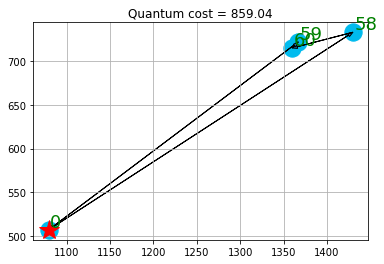

In [100]:
# Visualize the solution
def visualize_solution(xc, yc, x, C, n, K, title_str):
    plt.figure()
    plt.scatter(xc, yc, s=300, c='#00bbee')       #s -> marker size
    zone_nodes=zones[zone_id]
    for i in range(len(xc)):
        plt.annotate(zone_nodes[i], (xc[i] + 2, yc[i]+3), size=18, color='g')
    plt.plot(xc[0], yc[0], 'r*', ms=20)

    plt.grid()
    
    route_dict={}
    for ii in range(0, n ** 2):
        #print (ii, 'x: ',x[ii])
        if x[ii] > 0:
            ix = ii // n
            iy = ii % n
            plt.arrow(xc[ix], yc[ix], xc[iy] - xc[ix], yc[iy] - yc[ix], 
                      length_includes_head=True, head_width=4)
            #print('ix: ',ix, 'iy: ', iy)
            #print ('from: ', xc[ix], yc[ix], 'to: ',xc[ix]+xc[iy] - xc[ix], 'dy: ',yc[ix]+yc[iy] - yc[ix])
            route_dict[ix]=iy

    print(route_dict)
    route=[]
    for i in range(n):
        if (i==0): 
            route.append(0)
            key=i
        route.append(zone_nodes[route_dict[key]])
        key = route_dict[key]
    route=route[0:4]
    print('VQE soln for zone : ',zone_id,' -> ',route)   
    plt.title(title_str+' cost = ' + str(int(C * 100) / 100.))
    plt.show()    

# Put the solution in a way that is compatible with the classical variables
x_quantum = np.zeros(n**2)
kk = 0
for ii in range(n ** 2):
    if ii // n != ii % n:
        x_quantum[ii] = x_quantum2[kk]
        kk +=  1
print(xc)
print(yc)
print('x : ',x_quantum)
# visualize the solution 
visualize_solution(xc, yc, x_quantum, quantum_cost2, n, K, 'Quantum')    